In [1]:
import os
import matplotlib.pyplot as plt

import numpy as np
from random import random

from model import SocietyConstantsEnergyPrices
from model import GovernmentBuildChargingStation, GovernmentCloseChargingStation, GovernmentMixedStrategy
from model.utils import common_params

In [2]:
# plt.style.use("dark_background")
# plt.rc("grid", alpha=0.3)

In [3]:
pop = 673_900

area = 293  # [km^2]
print(pop / area)
print(area**0.5)

2300.0
17.11724276862369


przyjmuje skale 1:100

miasto 1j = 100m 
(54, 54)
populację 6_500, a osób posiadających auta 3_000
początkowa liczba ładowarek 6

In [4]:
30**0.5

5.477225575051661

In [5]:
T = 100
T = 12 * 50

# get_full_path = lambda x: os.sep.join(["data", x])
# energy_price = 6
# fuel_price = 600
# nerby_radius = 10
# city_size = (200, 200)
# alpha = 0.01
# corporation_margin = 0.2
# corporation_technological_progress = 0.0004
# initial_public_chargers = 100
# initial_time = (2015, 1)

# car_price_noise = lambda: random() * 10_000 - 5_000

In [6]:
common_params["kwargs"]['government'] = GovernmentMixedStrategy()

In [7]:
common_params["kwargs"]["nerby_radius"] = 2
# common_params["kwargs"]["population"] = 65_000
# common_params["kwargs"]["city_size"] = (54, 54)
# common_params["kwargs"]["initial_public_chargers"] = 6
common_params["kwargs"]

{'alpha': 0.01,
 'car_price_noise': <function model.utils.common_params.<lambda>()>,
 'city_size': (54, 54),
 'corporation_margin': 0.2,
 'corporation_technological_progress': 0.004,
 'energy_price': 600,
 'energy_factor': 1,
 'fuel_price': 6,
 'government': <model.Government.GovernmentMixedStrategy at 0x7ff92a6b71d0>,
 'initial_public_chargers': 6,
 'initial_time': (2015, 1),
 'nerby_radius': 2,
 'population': 3000}

In [8]:
class TmpSociety(SocietyConstantsEnergyPrices):
    def _set_unique_initial(self, **kwargs):
        self.coverage = []
        return super()._set_unique_initial(**kwargs)

    def _run(self, current_year: int, current_month: int) -> None:
        if current_month == 0:
            self.coverage.append(0)
            for customer in self.customers:
                if self.public_charging_nerby(customer):
                    self.coverage[-1] += 1
            self.coverage[-1] /= len(self.customers)
        return super()._run(current_year, current_month)

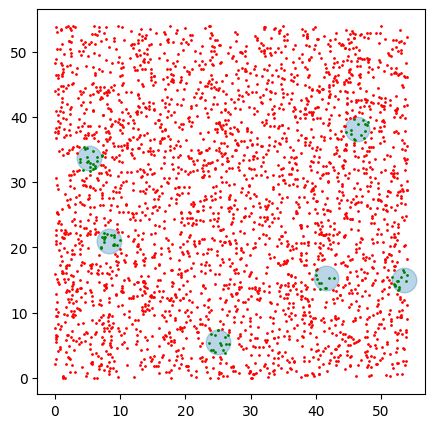

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
soc = TmpSociety(**common_params["kwargs"])
nerby_radius = common_params["kwargs"]["nerby_radius"]
initial_chargers = soc.city.charger_pos
customers = soc.customers
ax.axis("equal")
ax.scatter(
    initial_chargers[:, 0],
    initial_chargers[:, 1],
    alpha=0.3,
    # s=1000
    s=3.1415926 * 25 * nerby_radius**2,
)
customers_X = np.array([cus.home[0] for cus in customers])
customers_Y = np.array([cus.home[1] for cus in customers])
is_nerby_array = np.zeros(len(soc.customers))

for i, customer in enumerate(soc.customers):
    if soc.public_charging_nerby(customer):
        is_nerby_array[i] = 1

ax.scatter(
    customers_X[is_nerby_array == 1], customers_Y[is_nerby_array == 1], s=1, c="g"
)
ax.scatter(
    customers_X[is_nerby_array == 0], customers_Y[is_nerby_array == 0], s=1, c="r"
)

In [10]:
soc.run(T - 1)

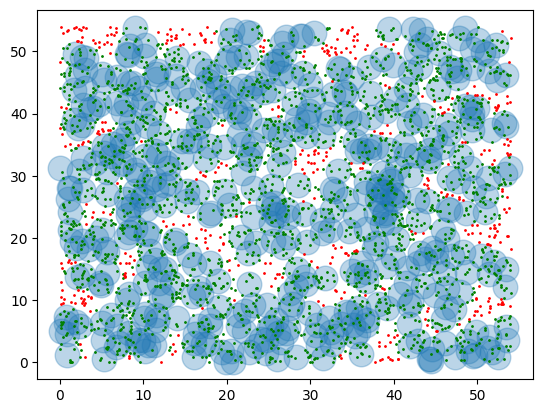

In [11]:
initial_chargers = soc.city.charger_pos
customers = soc.customers
plt.scatter(
    initial_chargers[:, 0],
    initial_chargers[:, 1],
    alpha=0.3,
    s=3.1415926 * 25 * nerby_radius**2,
)
customers_X = np.array([cus.home[0] for cus in customers])
customers_Y = np.array([cus.home[1] for cus in customers])
is_nerby_array = np.zeros(len(soc.customers))

for i, customer in enumerate(soc.customers):
    if soc.public_charging_nerby(customer):
        is_nerby_array[i] = 1

plt.scatter(
    customers_X[is_nerby_array == 1], customers_Y[is_nerby_array == 1], s=1, c="g"
)
plt.scatter(
    customers_X[is_nerby_array == 0], customers_Y[is_nerby_array == 0], s=1, c="r"
)

In [12]:
soc.city.count_chargers()

496

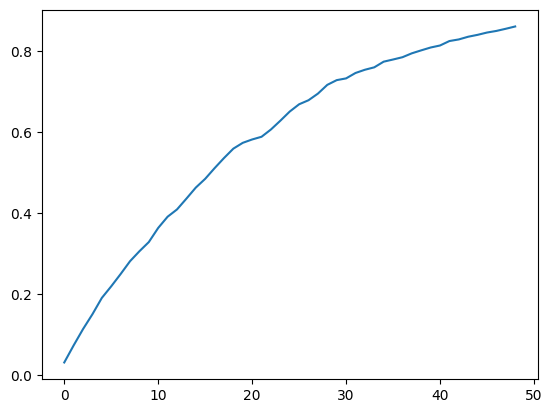

In [13]:
plt.plot(range((T - 1) // 12), soc.coverage)

In [14]:
soc.coverage

[0.030666666666666665,
 0.073,
 0.11333333333333333,
 0.15,
 0.19033333333333333,
 0.219,
 0.24933333333333332,
 0.281,
 0.30566666666666664,
 0.3283333333333333,
 0.36333333333333334,
 0.391,
 0.409,
 0.43566666666666665,
 0.463,
 0.4846666666666667,
 0.511,
 0.536,
 0.5593333333333333,
 0.5736666666666667,
 0.582,
 0.5886666666666667,
 0.6066666666666667,
 0.6283333333333333,
 0.651,
 0.669,
 0.679,
 0.6953333333333334,
 0.717,
 0.7286666666666667,
 0.733,
 0.7463333333333333,
 0.7543333333333333,
 0.7603333333333333,
 0.7743333333333333,
 0.7796666666666666,
 0.7853333333333333,
 0.795,
 0.8023333333333333,
 0.8093333333333333,
 0.8143333333333334,
 0.8253333333333334,
 0.8293333333333334,
 0.836,
 0.8406666666666667,
 0.8463333333333334,
 0.8503333333333334,
 0.8556666666666667,
 0.8613333333333333]